In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
ticker_symbol = 'AAPL'
start_date = '2025-01-01'
end_date = '2025-04-17' #current date
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [16]:
highest_price = data['High'].max()
lowest_price = data['Low'].min()
print(f"Highest Price: {highest_price.item()}")
print(f"Lowest Price: {lowest_price.item()}")

Highest Price: 249.10000610351562
Lowest Price: 219.3800048828125


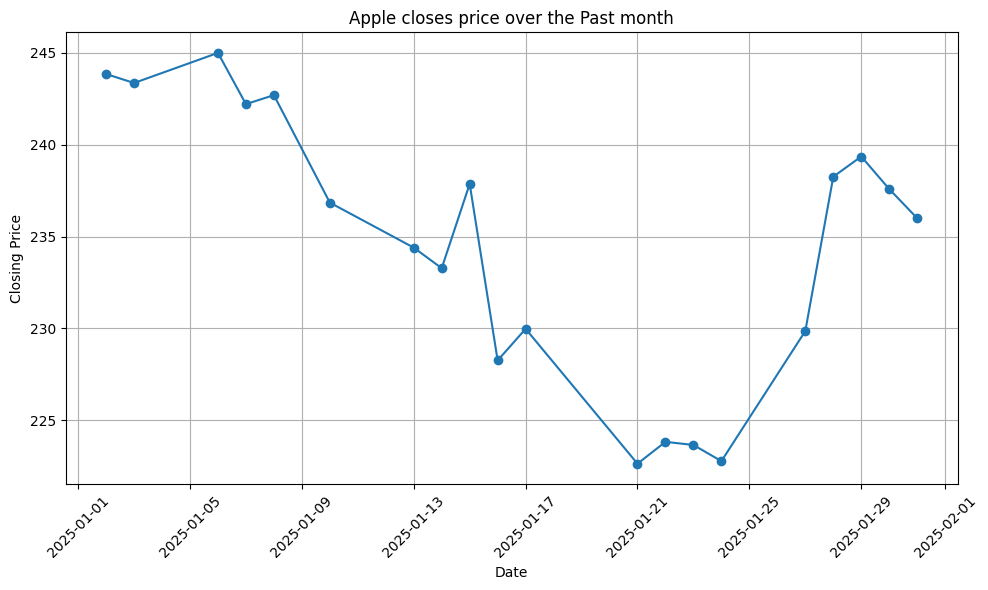

In [10]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'],marker='o')
plt.title(f'Apple closes price over the Past month')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Additional Information
# April 17
# call
# ask -> 0.91

# put
# 8

# strike price
# $235

# Brake even price for call -> 235 + 0.91 = 235.91
# Brake even price for put -> 235 - 8 = 227

In [24]:
# Strike price for long put

import numpy as np

spot_price = data['Close'].iloc[-1] #closest price

strike_price_long_put = 235
premium_long_put = 8

strike_price_long_call = 235
premium_long_call = 0.91

#range of stock price expiration
sT = np.linspace(0, 2 * spot_price, num=500)

print(f"Stock price range at expiration: {sT[:10]}...")

Stock price range at expiration: [[0.        ]
 [0.91386771]
 [1.82773543]
 [2.74160314]
 [3.65547085]
 [4.56933857]
 [5.48320628]
 [6.39707399]
 [7.31094171]
 [8.22480942]]...


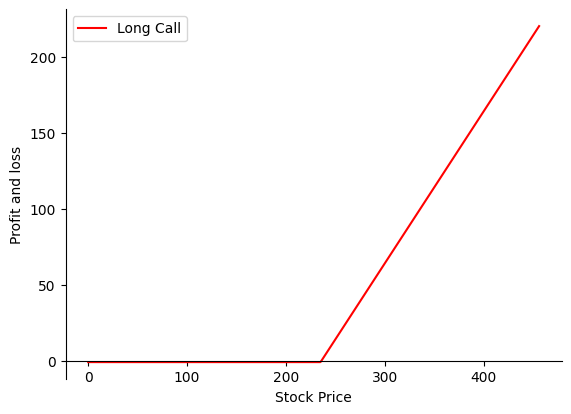

In [26]:
def call_payoff(sT, strike_price, premium):
   return np.where(sT > strike_price, sT - strike_price, 0) - premium

payoff_long_call = call_payoff (sT, strike_price_long_call, premium_long_call)

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

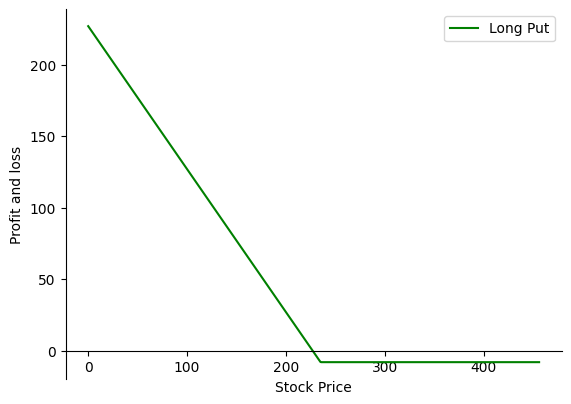

In [27]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='Long Put',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Max Profit: Unlimited
Max Loss: [-8.77400236]


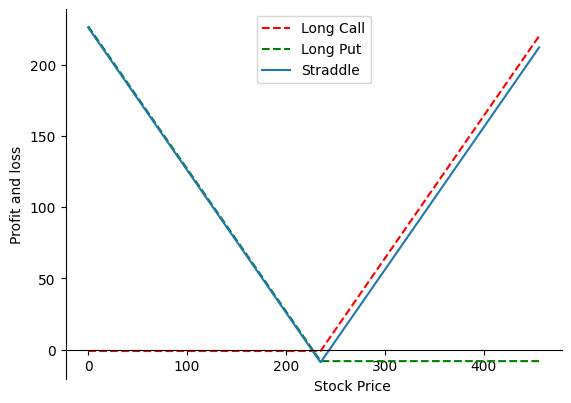

In [29]:
payoff_straddle = payoff_long_call + payoff_long_put

print ("Max Profit: Unlimited")
print ("Max Loss:", min(payoff_straddle))

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')

ax.plot(sT,payoff_long_call,'--',label='Long Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_straddle,label='Straddle')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()